In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pywt
from scipy.io import wavfile
import cv2

%matplotlib inline
%load_ext autoreload
%autoreload 2

pywt.families() = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
pywt.wavelist('db') = ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
len(x) = 97


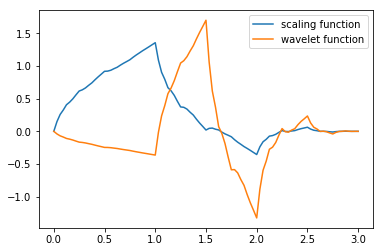

In [2]:
#### visualize (mother) wavelet and scaling (father wavelet) functions
print('pywt.families() = %s' % pywt.families())
print('pywt.wavelist(\'db\') = %s' % pywt.wavelist('db'))
phi, psi, x = pywt.Wavelet('db2').wavefun(level=5) # level of refinement
print('len(x) = %s' % len(x))

plt.figure()
plt.plot(x,phi,label='scaling function')
plt.plot(x,psi,label='wavelet function')
plt.legend()

In [3]:
#### read audio (time series) data
fs,data = wavfile.read('input.wav')
print('fs = %s' % fs)
print('len(data) = %s' % len(data))

fs = 24000
len(data) = 47033


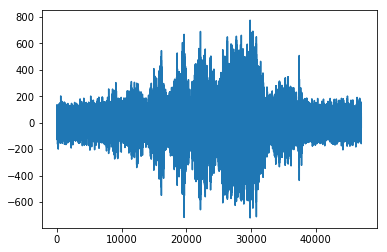

In [4]:
plt.figure()
plt.plot(data)

In [5]:
#### 1-D wavelet transform
coeffs = pywt.wavedec(data,'db2',level=4)
print('np.shape(coeffs) = '+str(np.shape(coeffs)))
for coeff in coeffs:
    print('np.shape(coeff) = %s' % (len(coeff),))   
#print(coeffs[0])

np.shape(coeffs) = (5,)
np.shape(coeff) = 2942
np.shape(coeff) = 2942
np.shape(coeff) = 5881
np.shape(coeff) = 11760
np.shape(coeff) = 23518


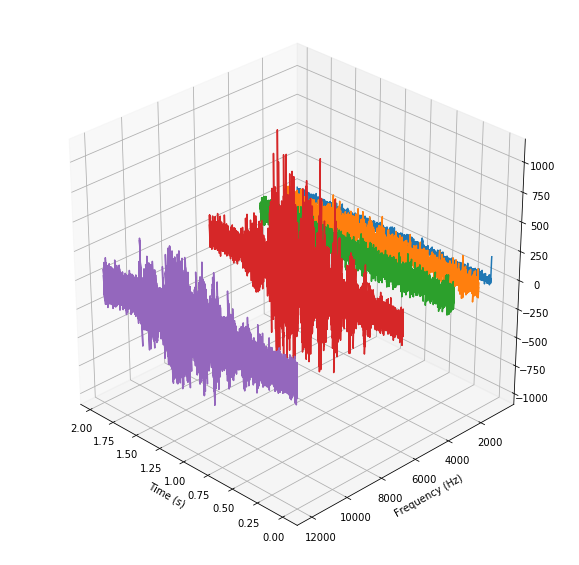

In [6]:
# TFR using discrete wavelets
F = len(coeffs)
T = len(data)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
for k,coeff in enumerate(coeffs):
    delta = T/len(coeff)
    x = np.arange(delta,T+delta,delta,dtype=int)/fs
    y = 2**(k+1)/2**F*(fs/2)*np.ones(len(x))
    ax.plot(x,y,coeff)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

ax.view_init(30, 135)

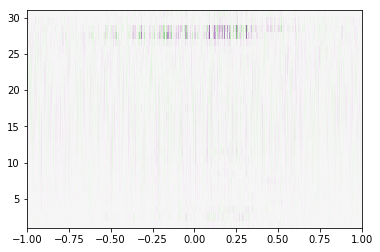

In [7]:
# TFR using continuous wavelets
# Gabor/Morlet wavelet transform offers
# optimal trade-off in time-frequency resolution
# Hence Gaussian window in STFT is called Gabor transform
# See https://en.wikipedia.org/wiki/Gabor_wavelet
cwtmatr, freqs = pywt.cwt(data, np.arange(1,31), 'morl')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) 

In [8]:
#### read image data
imgColor = cv2.imread('input.png')
#print(np.shape(imgColor))
imgGray = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
print(np.shape(imgGray))

(512, 512)


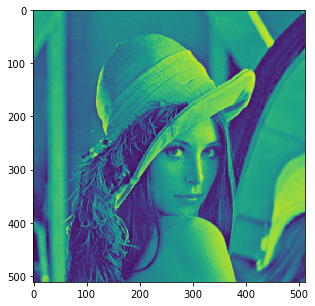

In [9]:
plt.figure(figsize=(10,5))
plt.imshow(imgGray)

In [10]:
#### 2-D wavelet transform, single level decomposiion
coeffs = pywt.dwt2(imgGray, 'db2')
cA, (cH, cV, cD) = coeffs
print('np.shape(coeffs) = %s' % (np.shape(coeffs),))
print('np.shape(cA) = %s' % (np.shape(cA),))

np.shape(coeffs) = (2,)
np.shape(cA) = (257, 257)


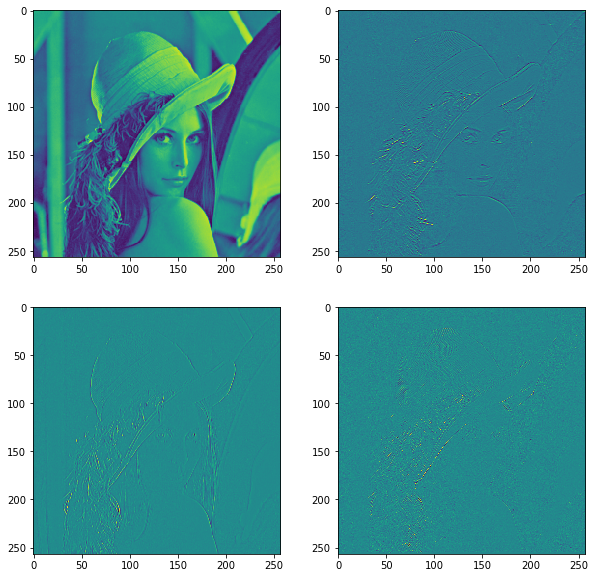

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cA)
plt.subplot(222)
plt.imshow(cH)
plt.subplot(223)
plt.imshow(cV)
plt.subplot(224)
plt.imshow(cD)

In [12]:
#### 2-D wavelet transform, multilevel decomposiion
coeffs = pywt.wavedec2(imgGray, 'db2',level=2)
#print('np.shape(coeffs) = %s' % (np.shape(coeffs),))
for coeff in coeffs:
    print('np.shape(coeff) = %s' % (np.shape(coeff),))
#print('coeffs[0][0,0] = %s' % coeffs[0][0,0])

np.shape(coeff) = (130, 130)
np.shape(coeff) = (3, 130, 130)
np.shape(coeff) = (3, 257, 257)


In [13]:
def normwt(coeffs):
    # normalize wavelet coeffs
    ncoeffs = [coeffs[0]/np.linalg.norm(coeffs[0])]
    for k in range(1,len(coeffs)):
        tmp = ()
        for l in range(3):
            tmp += (coeffs[k][l]/np.linalg.norm(coeffs[k][l]),)
        ncoeffs.append(tmp)

    return ncoeffs

In [15]:
# Concatenating all coefficients into a single array
ncoeffs = normwt(coeffs)
#for coeff in ncoeffs:
#    print(np.shape(coeff))
arr,_ = pywt.coeffs_to_array(ncoeffs)
print('np.shape(arr) = %s' % (np.shape(arr),))

np.shape(arr) = (517, 517)


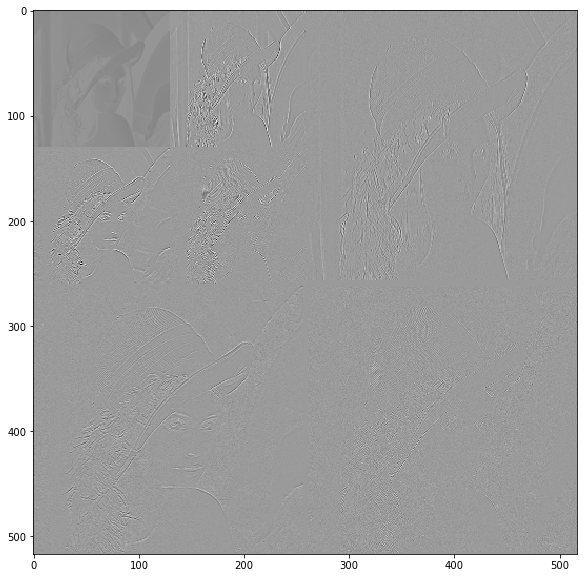

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap='Greys')